In [1]:
pwd

'd:\\pydatamining'

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install xlrd


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [8]:
df = pd.read_excel("online_retail_II.xlsx")
celana = df.loc[df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']

In [10]:
celana['InvoiceDate'].min(), celana['InvoiceDate'].max()

(Timestamp('2009-12-01 09:46:00'), Timestamp('2010-12-09 18:09:00'))

In [11]:
cols = ['Invoice','StockCode', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'billingPhone', 'billingCountry', 'itemName', 'variation']
celana.drop(cols, axis=1, inplace=True)
celana = celana.sort_values('createTime')
celana.isnull().sum()

KeyError: "['orderItemId', 'sellerSku', 'customerName', 'payMethod', 'billingAddr3', 'billingAddr4', 'billingAddr5', 'billingPhone', 'billingCountry', 'itemName', 'variation'] not found in axis"

In [ ]:
celana = celana.groupby('createTime')['paidPrice'].sum().reset_index()

In [ ]:
celana = celana.set_index('createTime')
celana.index

DatetimeIndex(['2021-03-14 09:13:00', '2021-03-17 20:15:00',
               '2021-03-20 19:05:00', '2021-03-21 12:43:00',
               '2021-03-23 21:47:00', '2021-03-24 19:42:00',
               '2021-03-26 09:23:00', '2021-03-26 14:32:00',
               '2021-03-27 11:40:00', '2021-03-27 19:15:00',
               ...
               '2023-07-17 09:55:00', '2023-07-26 20:32:00',
               '2023-08-11 13:16:00', '2023-08-16 19:34:00',
               '2023-08-18 06:09:00', '2023-08-19 18:22:00',
               '2023-08-29 11:00:00', '2023-09-04 17:54:00',
               '2023-09-11 14:59:00', '2023-09-15 18:13:00'],
              dtype='datetime64[ns]', name='createTime', length=1349, freq=None)

In [ ]:
y = celana['paidPrice'].resample('MS').mean()

<Axes: xlabel='createTime'>

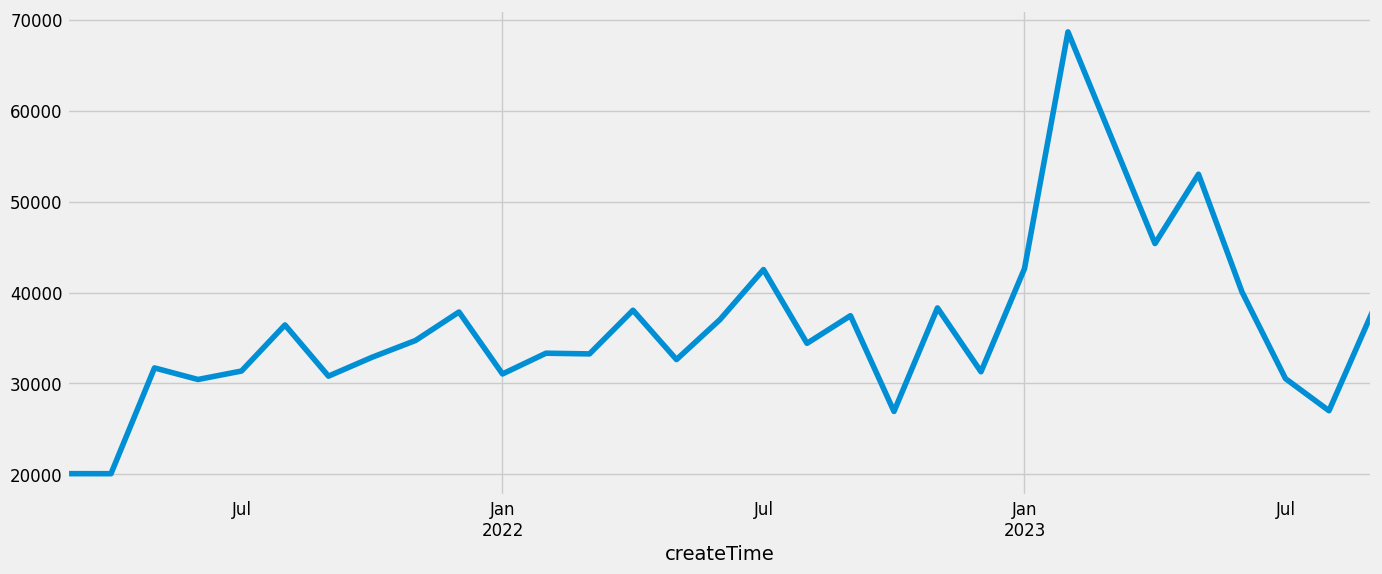

In [ ]:
y.plot(figsize=(15, 6))

In [ ]:
plt.show()

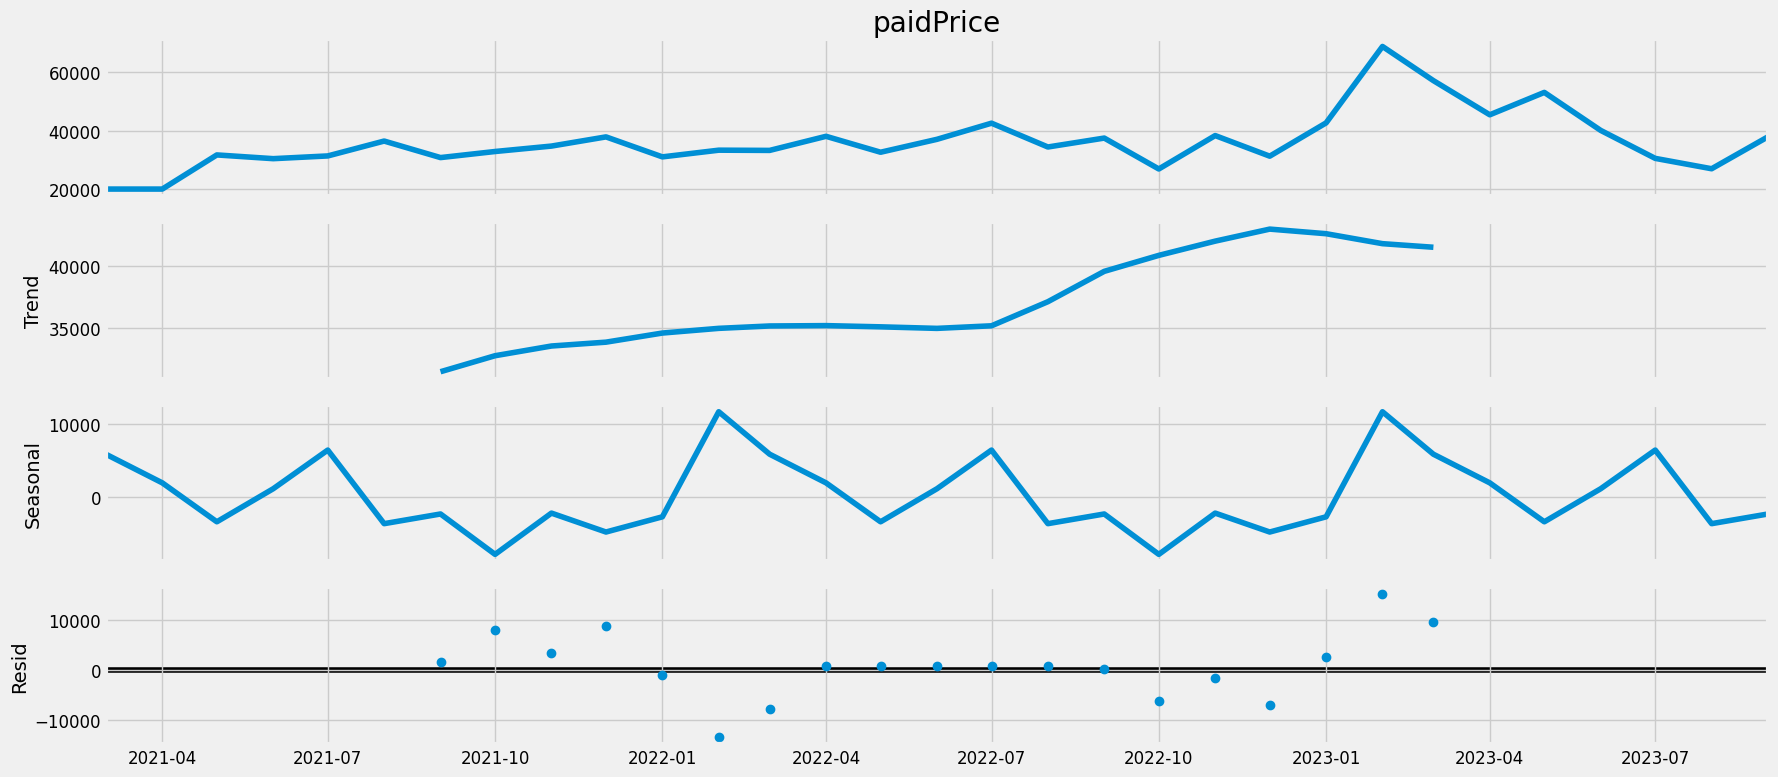

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
df.isnull().any()

orderItemId       False
sellerSku         False
createTime        False
customerName      False
billingAddr3      False
billingAddr4      False
billingAddr5      False
billingPhone      False
billingCountry    False
payMethod         False
paidPrice         False
itemName          False
variation         False
dtype: bool

In [ ]:
print(df.dtypes)

orderItemId                int64
sellerSku                 object
createTime        datetime64[ns]
customerName              object
billingAddr3              object
billingAddr4              object
billingAddr5              object
billingPhone              object
billingCountry            object
payMethod                 object
paidPrice                float64
itemName                  object
variation                 object
dtype: object


In [ ]:
df.isnull().sum()

orderItemId       0
sellerSku         0
createTime        0
customerName      0
billingAddr3      0
billingAddr4      0
billingAddr5      0
billingPhone      0
billingCountry    0
payMethod         0
paidPrice         0
itemName          0
variation         0
dtype: int64

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
   for param_seasonal in seasonal_pdq:
      try:
        mod = sm.tsa.statespace.SARIMAX(y,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
      except:
        continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:719.8656675515881
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:468.44837690361317
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:395.63575316528755
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:132.31278816491474
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:415.3213035032136
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:397.9639882366304
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:155.6808875897844
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:134.2513600183664
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:679.2513337150714
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:399.4487680586761
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:370.2431748937125
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:111.94396513197113
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:443.969037328483
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:399.8780095089747
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:153.70096538903854
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:112.47363181823059
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:611.3394484304162
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:366.84795502368945
ARIM

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                   order=(1, 1, 1),
                   seasonal_order=(0, 1, 1, 12),
                   enforce_stationarity=False,
                   enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1981     10.778     -0.018      0.985     -21.323      20.926
ma.L1         -0.2003     17.515     -0.011      0.991     -34.529      34.128
ma.S.L12      -2.0340     15.955     -0.127      0.899     -33.305      29.237
sigma2      1.817e+08   3.37e-08   5.39e+15      0.000    1.82e+08    1.82e+08


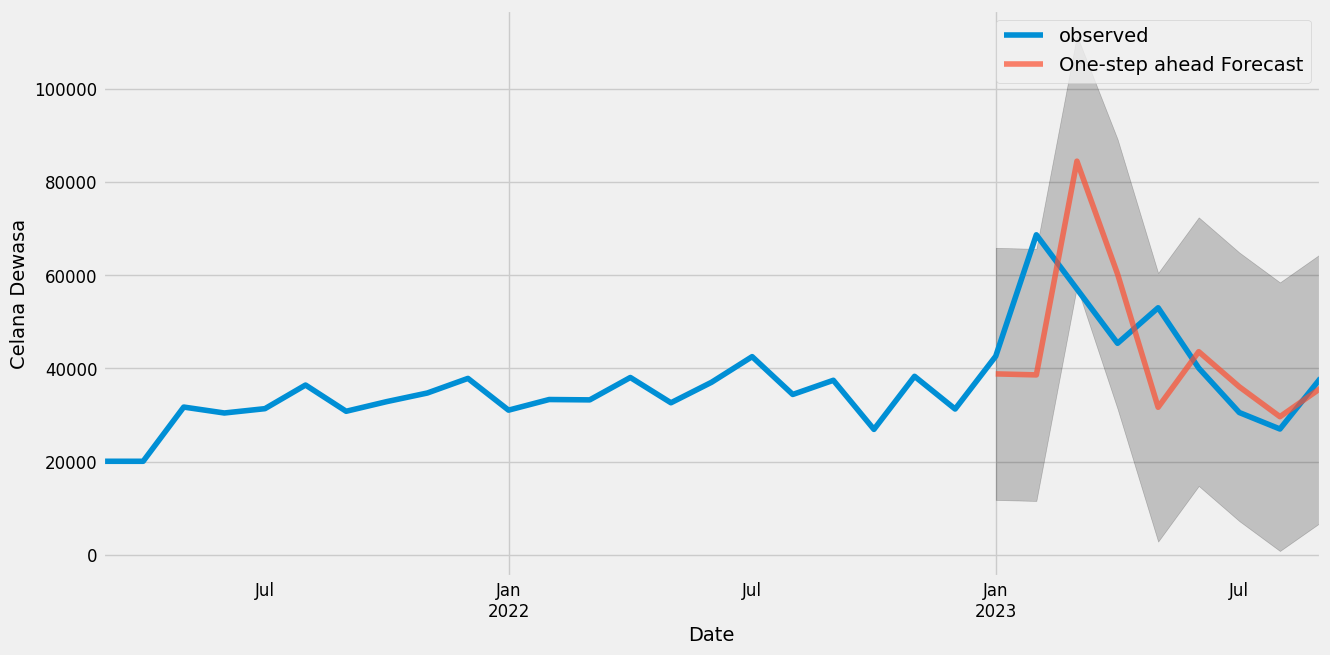

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
           pred_ci.iloc[:, 0],
           pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Celana Dewasa')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean

In [ ]:
y_truth = y['2023-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 267329695.37


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 16350.22


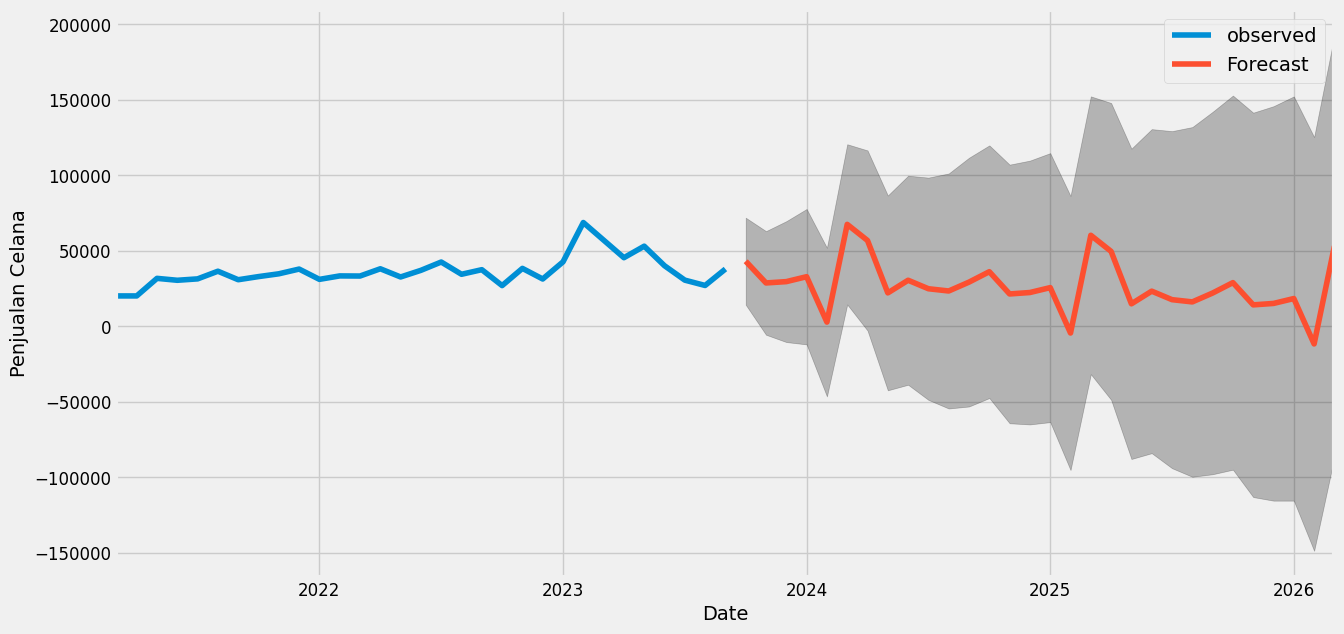

In [ ]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
           pred_ci.iloc[:, 0],
           pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Penjualan Celana')
plt.legend()
plt.show()

In [ ]:
import pickle
pickle.dump(mod, open('model.pkl', 'wb'))

In [ ]:
model = pickle.load(open('model.pkl', 'rb'))


In [ ]:
print(model.predict([[]]))

NotImplementedError: 